age age in years

sex

bmi body mass index

bp average blood pressure

s1 tc, total serum cholesterol

s2 ldl, low-density lipoproteins

s3 hdl, high-density lipoproteins

s4 tch, total cholesterol / HDL

s5 ltg, possibly log of serum triglycerides level

s6 glu, blood sugar level

In [14]:
import pandas as pd

df = pd.read_csv("diabetes.tab.tsv", sep='\t')
df.rename(columns={'S1': 'TC',
                   'S2': 'LDL',
                   'S3': 'HDL',
                   'S4': 'TCH',
                   'S5': 'LTG',
                   'S6': 'GLU'
                   }, inplace=True)
df

,AGE,SEX,BMI,BP,TC,LDL,HDL,TCH,LTG,GLU,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


In [15]:
# Extracting the features and target variable
x = df.drop('Y', axis=1)
y = df['Y']


In [16]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [17]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y=True)
X = X[:, [2]]  # Use only one feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, shuffle=False)

In [18]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression().fit(X_train, y_train)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = regressor.predict(X_test)

print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.2f}")

Mean squared error: 2548.07
Coefficient of determination: 0.47


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('diabetes.tab.tsv', sep='\t')

# Assuming that the feature and target columns need to be specified
X = df[['BMI']]  # 'bmi' as an example feature column
y = df['Y']  # 'response' as an example target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, shuffle=False)
# Initialize and train the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)

# Calculate mean squared error and coefficient of determination
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse:.2f}")
print(f"Coefficient of determination: {r2:.2f}")

Mean squared error: 2548.07
Coefficient of determination: 0.47


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('diabetes.tab.tsv', sep='\t')

# Assuming that the feature and target columns need to be specified
X = df[['BMI']]  # 'bmi' as an example feature column
y = df['Y']  # 'response' as an example target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, shuffle=False)
# Initialize and train the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)

# Calculate mean squared error and coefficient of determination
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse:.2f}")
print(f"Coefficient of determination: {r2:.2f}")
# Create DataFrames for the training and test sets with predictions
train_df = pd.DataFrame({
    'BMI': X_train.squeeze(),
    'Disease Progression': y_train,
    'Set': 'Train',
    'Prediction': regressor.predict(X_train)
})

test_df = pd.DataFrame({
    'BMI': X_test.squeeze(),  # Ensure it's a 1D array if necessary
    'Disease Progression': y_test,
    'Set': 'Test',
    'Prediction': y_pred
})

# Combine the datasets
full_df = pd.concat([train_df, test_df])

import altair as alt

# Base chart for actual data points
points = alt.Chart(full_df).mark_point().encode(
    x=alt.X('BMI', title='BMI'),
    y=alt.Y('Disease Progression', title='Disease Progression'),
    color=alt.Color('Set', legend=alt.Legend(title="Dataset Type")),
    tooltip=['BMI', 'Disease Progression', 'Set']
)

# Line chart for predictions
predictions = alt.Chart(full_df).mark_line().encode(
    x='BMI',
    y='Prediction',
    color=alt.Color('Set', legend=alt.Legend(title="Dataset Type")),
    detail='Set'
)

# Combine the points and lines into one chart
chart = alt.layer(points, predictions).facet(
    column='Set:N'
).properties(
    title="Linear Regression Analysis of Diabetes Progression Based on BMI"
)

# Display the chart
chart

Mean squared error: 2548.07
Coefficient of determination: 0.47


alt.FacetChart(...)

In [22]:
import pandas as pd
import altair as alt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('diabetes.tab.tsv', sep='\t')

# Assuming that the feature and target columns need to be specified
X = df[['BMI']]  # 'bmi' as an example feature column
y = df['Y']  # 'response' as an example target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, shuffle=False)
# Initialize and train the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)

# Calculate mean squared error and coefficient of determination
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse:.2f}")
print(f"Coefficient of determination: {r2:.2f}")
# Create DataFrames for the training and test sets with predictions
train_df = pd.DataFrame({
    'BMI': X_train.squeeze(),
    'Disease Progression': y_train,
    'Set': 'Train',
    'Prediction': regressor.predict(X_train)
})

test_df = pd.DataFrame({
    'BMI': X_test.squeeze(),  # Ensure it's a 1D array if necessary
    'Disease Progression': y_test,
    'Set': 'Test',
    'Prediction': y_pred
})

# Combine the datasets
full_df = pd.concat([train_df, test_df])

# Base chart for actual data points
points = alt.Chart(full_df).mark_point().encode(
    x=alt.X('BMI', title='BMI'),
    y=alt.Y('Disease Progression', title='Disease Progression'),
    color=alt.Color('Set', legend=alt.Legend(title="Dataset Type")),
    tooltip=['BMI', 'Disease Progression', 'Set']
)

# Line chart for predictions
predictions = alt.Chart(full_df).mark_line().encode(
    x='BMI',
    y='Prediction',
    color=alt.Color('Set', legend=alt.Legend(title="Dataset Type")),
    detail='Set'
)

# Combine the points and lines into one chart
chart = alt.layer(points, predictions).facet(
    column='Set:N'
).properties(
    title="Linear Regression Analysis of Diabetes Progression Based on BMI"
)

# Display the chart
chart

Mean squared error: 2548.07
Coefficient of determination: 0.47


alt.FacetChart(...)

In [7]:
import pandas as pd
import altair as alt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('diabetes.tab.tsv', sep='\t')
df.rename(columns={'S1': 'TC', 'S2': 'LDL', 'S3': 'HDL', 'S4': 'TCH', 'S5': 'LTG', 'S6': 'GLU'}, inplace=True)

# Select multiple features and handle missing values
features = ['AGE', 'SEX', 'BMI', 'BP', 'TC', 'LDL', 'HDL', 'TCH', 'LTG', 'GLU']
X = df[features].copy()  # Create a copy of the data to avoid SettingWithCopyWarning
y = df['Y']  # Adjust the target column name if necessary

# Impute missing values with the mean of each column
X.fillna(X.mean(), inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=42, shuffle=False)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_test = regressor.predict(X_test_scaled)

# Calculate mean squared error and coefficient of determination
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"Mean squared error: {mse:.2f}")
print(f"Coefficient of determination: {r2:.2f}")

# Prepare data for visualization
train_df = pd.DataFrame({
    'BMI': X_train['BMI'].values,
    'Disease Progression': y_train,
    'Set': 'Train',
    'Prediction': regressor.predict(X_train_scaled)
})

test_df = pd.DataFrame({
    'BMI': X_test['BMI'].values,
    'Disease Progression': y_test,
    'Set': 'Test',
    'Prediction': y_pred_test
})

full_df = pd.concat([train_df, test_df])

# Create an Altair chart
base = alt.Chart(full_df).encode(
    x=alt.X('BMI', title='BMI'),
    y=alt.Y('Disease Progression', title='Disease Progression'),
    color=alt.Color('Set:N', legend=alt.Legend(title="Dataset Type")),
    tooltip=['BMI', 'Disease Progression', 'Set']
)

points = base.mark_point()

# Adding regression lines
best_fit_line = base.transform_regression(
    'BMI', 'Disease Progression', groupby=['Set']
).mark_line()

chart = alt.layer(points, best_fit_line).facet(
    column='Set:N'
).properties(
    title="Linear Regression Analysis of Diabetes Progression Based on BMI"
)

chart.display()

Mean squared error: 2004.52
Coefficient of determination: 0.59


alt.FacetChart(...)

In [24]:
import pandas as pd
import altair as alt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('diabetes.tab.tsv', sep='\t')
df.rename(columns={'S1': 'TC', 'S2': 'LDL', 'S3': 'HDL', 'S4': 'TCH', 'S5': 'LTG', 'S6': 'GLU'}, inplace=True)

# Select multiple features and handle missing values
features = ['AGE', 'SEX', 'BMI', 'BP', 'TC', 'LDL', 'HDL', 'TCH', 'LTG', 'GLU']
X = df[features].copy()
y = df['Y']

# Impute missing values with the mean of each column
X.fillna(X.mean(), inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_test = regressor.predict(X_test_scaled)

# Calculate mean squared error and coefficient of determination
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"Mean squared error: {mse:.2f}")
print(f"Coefficient of determination: {r2:.2f}")

# Prepare data for visualization
full_df = pd.DataFrame({
    'Feature Value': pd.concat([X_train, X_test])[features[2]].values,
    'Disease Progression': pd.concat([y_train, y_test]).values,
    'Set': ['Train'] * len(y_train) + ['Test'] * len(y_test)
})

# Dropdown for feature selection
dropdown = alt.binding_select(options=features, name='Feature')
selection = alt.selection_point(fields=['Feature'], bind=dropdown, init={'Feature': 'BMI'})

# Dynamic Altair Chart
chart = alt.Chart(full_df).mark_point().encode(
    x='Feature Value:Q',
    y='Disease Progression:Q',
    color='Set:N',
    tooltip=['Feature Value', 'Disease Progression', 'Set']
).add_selection(
    selection
).transform_filter(
    selection
).properties(
    width=600,
    height=400,
    title="Linear Regression Analysis of Selected Feature Against Disease Progression"
)

chart.display()

Mean squared error: 2900.19
Coefficient of determination: 0.45


TypeError: altair.vegalite.v5.schema.core.SelectionParameter() got multiple values for keyword argument 'value'

In [25]:
import pandas as pd
import altair as alt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('diabetes.tab.tsv', sep='\t')
df.rename(columns={'S1': 'TC', 'S2': 'LDL', 'S3': 'HDL', 'S4': 'TCH', 'S5': 'LTG', 'S6': 'GLU'}, inplace=True)

# Select multiple features and handle missing values
features = ['AGE', 'SEX', 'BMI', 'BP', 'TC', 'LDL', 'HDL', 'TCH', 'LTG', 'GLU']
X = df[features].copy()  # Create a copy of the data to avoid SettingWithCopyWarning
y = df['Y']

# Impute missing values with the mean of each column
X.fillna(X.mean(), inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_test = regressor.predict(X_test_scaled)

# Calculate mean squared error and coefficient of determination
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"Mean squared error: {mse:.2f}")
print(f"Coefficient of determination: {r2:.2f}")

# Prepare data for visualization
full_df = pd.DataFrame({
    'Feature Value': pd.concat([X_train, X_test])[features[2]].values,  # Example with 'BMI'
    'Disease Progression': pd.concat([y_train, y_test]).values,
    'Set': ['Train'] * len(y_train) + ['Test'] * len(y_test)
})

# Dropdown for feature selection
dropdown = alt.binding_select(options=features, name='Feature')
selection = alt.selection_single(fields=['Feature'], bind=dropdown, init={'Feature': 'BMI'})

# Dynamic Altair Chart
chart = alt.Chart(full_df).mark_point().encode(
    x=alt.X('Feature Value:Q', title='Feature Value'),
    y=alt.Y('Disease Progression:Q', title='Disease Progression'),
    color=alt.Color('Set:N', legend=alt.Legend(title="Dataset Type")),
    tooltip=['Feature Value', 'Disease Progression', 'Set']
).add_selection(
    selection
).transform_filter(
    selection
).properties(
    width=600,
    height=400,
    title="Linear Regression Analysis of Selected Feature Against Disease Progression"
)

chart.display()

Mean squared error: 2900.19
Coefficient of determination: 0.45


/var/folders/2x/nb12s_ds76v174m5nkht_1lm0000gn/T/ipykernel_13999/4084215263.py:51: AltairDeprecationWarning: 
Deprecated since `altair=5.0.0`. Use selection_point instead.
  selection = alt.selection_single(fields=['Feature'], bind=dropdown, init={'Feature': 'BMI'})


TypeError: altair.vegalite.v5.schema.core.SelectionParameter() got multiple values for keyword argument 'value'

In [13]:
from flask import Flask, request, jsonify
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np

app = Flask(__name__)

# Generate some sample data and train a KMeans model for demonstration
data, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
model = KMeans(n_clusters=4)
model.fit(data)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Extract data point from request
        data_point = np.array([request.json['data']])
        prediction = model.predict(data_point)
        return jsonify({'cluster': int(prediction[0])})
    except KeyError as e:
        return jsonify({'error': f'Missing data for {str(e)}'}), 400
    except Exception as e:
        return jsonify({'error': str(e)}), 500

@app.route('/centres', methods=['GET'])
def centres():
    try:
        centers = model.cluster_centers_
        return jsonify({'cluster_centers': centers.tolist()})
    except Exception as e:
        return jsonify({'error': str(e)}), 500

@app.route('/data', methods=['GET'])
def get_data():
    try:
        # Assuming 'data' is the entire dataset loaded into the model
        df = pd.DataFrame(data, columns=['Feature1', 'Feature2'])
        df['Cluster'] = model.labels_
        return df.to_json(orient='records')
    except Exception as e:
        return jsonify({'error': str(e)}), 500

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (fsevents)
0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1074, in launch_instance
    app.initialize(argv)
  File "/opt/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 118, in inner
    return method(app, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fil

SystemExit: 1

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Mean squared error: 2548.07
Coefficient of determination: 0.47


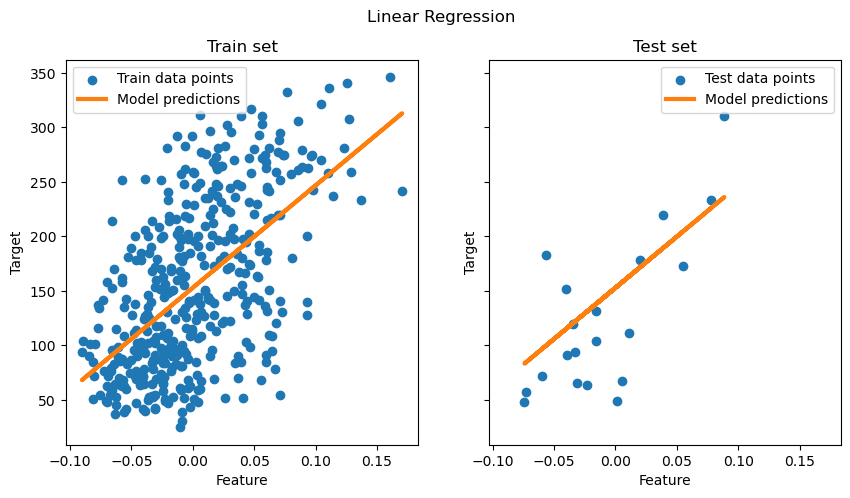

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y=True)
X = X[:, [2]]  # Use only one feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, shuffle=False)

regressor = LinearRegression().fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.2f}")

fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)

ax[0].scatter(X_train, y_train, label="Train data points")
ax[0].plot(
    X_train,
    regressor.predict(X_train),
    linewidth=3,
    color="tab:orange",
    label="Model predictions",
)
ax[0].set(xlabel="Feature", ylabel="Target", title="Train set")
ax[0].legend()

ax[1].scatter(X_test, y_test, label="Test data points")
ax[1].plot(X_test, y_pred, linewidth=3, color="tab:orange", label="Model predictions")
ax[1].set(xlabel="Feature", ylabel="Target", title="Test set")
ax[1].legend()

fig.suptitle("Linear Regression")

plt.show(fig)

In [3]:
from pickle import dump, load

with open("../AE2/model.pkl", "wb") as f:
    dump(regressor, f, protocol=5)

with open("../AE2/chart.pkl", "wb") as f:
    dump(fig, f, protocol=5)


with open("../AE2/chart.pkl", "rb") as f:
    data = load(f)

with open("../AE2/model.pkl", "rb") as f:
    model = load(f)

In [6]:
model.predict([[0.1]])


array([246.74264795])

In [ ]:
# Assuming the data is preloaded and preprocessed
df = pd.read_csv("diabetes.tab.tsv", sep="\t")
df.rename(
    columns={
        "S1": "TC",
        "S2": "LDL",
        "S3": "HDL",
        "S4": "TCH",
        "S5": "LTG",
        "S6": "GLU",
    },
    inplace=True,
)
features = ["AGE", "SEX", "BMI", "BP", "TC", "LDL", "HDL", "TCH", "LTG", "GLU"]
X = df[features]
y = df["Y"]
X.fillna(X.mean(), inplace=True)

# Fit a Linear Regression model
regressor = LinearRegression()
regressor.fit(X, y)

# Fit a KMeans clustering model
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)